### 1. 创造模拟数据集

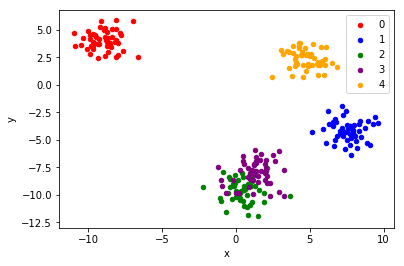

In [115]:
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

% matplotlib inline

# generate 2d classification dataset
X, y = make_blobs(n_samples=250, centers=5, n_features=2)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:"green", 3:"purple", 4:"orange"}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### 2. 编写 k-means 算法

In [11]:
import numpy as np
a = np.random.rand(3,3)
a

array([[0.51041381, 0.86705499, 0.93396588],
       [0.59028346, 0.21591894, 0.72433418],
       [0.30027405, 0.9771065 , 0.70656654]])

In [30]:
import numpy as np

inx = np.random.choice(len(a), 2, replace=False)

a[inx]


array([[0.51041381, 0.86705499, 0.93396588],
       [0.30027405, 0.9771065 , 0.70656654]])

In [179]:
import numpy as np

class KMeans(object):
    def __init__(self, class_num, max_iter=300):
        """ 初始化算法参数
        
        arguments:
        ----------
        class_num : int, 聚类个数
        """
        self._class_num = class_num
        self._max_iter = max_iter
        self._labels = np.array(range(class_num))
        self._centers = None
    
    def _init(self, X):
        """ 初始化各个类簇的中心点
        随机选择 class_num 个点作为聚类中心
        """
        inx = np.random.choice(len(X), self._class_num, replace=False)
        self._centers = np.array(X)[inx]
    
    def _cal_division(self, X):
        """ 根据各个类簇的中心点， 计算划分
        """
        # 扩展 X, 形式 [x1, x1, ... x1, x2, x2, ...., xm, ...xm]
        repeat_X = np.repeat(X, self._class_num, axis=0)
        # 扩展 self._centers, 形式 [u1, u2,..uk, u1, u2, ..uk, ... , u1, u2, ..., uk]
        repeat_centers = np.tile(self._centers, [len(X), 1])
        # 计算欧式距离
        euclidean_distance = np.sqrt(np.sum((repeat_X - repeat_centers) * (repeat_X - repeat_centers), axis=1))
        # 进行划分
        reshape_ed = np.reshape(euclidean_distance, [len(X), self._class_num])
        return np.argmin(reshape_ed, axis=1)
    
    def _update_centers(self, X, labels):
        """ 根据划分，重新更新各个类错的中心点
        """
        for inx in self._labels:
            # 获取属于 inx 的样本
            X_inx = X[labels==inx]
            # 计算 inx 类标记的类中心
            self._centers[inx] = np.mean(X_inx, axis=0)
            
    def fit(self, X):
        """ 对样本集合 X 进行聚类
        arguments:
        ----------
        X: numpy shape = (n_sample, n_feature)
        """
        # 初始化
        self._init(X)
        
        # 迭代 1000 次
        for i in range(self._max_iter):
            labels = self._cal_division(X)
            self._update_centers(X, labels)
    
    def predict(self, X):
        """ 对样本集合进行预测
        arguments:
        ----------
        X: numpy shape = (n_sample, n_feature)
        
        returns:
        --------
        labels: numpy, shape=(n_sample, 1)
        """
        return self._cal_division(X)
        

In [180]:
import time
k_means = KMeans(class_num=5)

tic = time.time()
k_means.fit(X)
toc = time.time()

toc - tic

0.13828086853027344

In [181]:
k_means._centers

array([[ 0.47424745, -9.8260732 ],
       [-8.98196286,  4.02170834],
       [ 1.33314782, -7.69113145],
       [ 7.58629668, -4.18669677],
       [ 4.7747446 ,  2.33780802]])

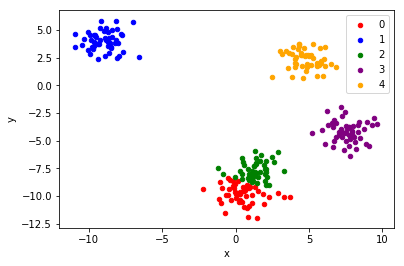

In [182]:
y = k_means.predict(X)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:"green", 3:"purple", 4:"orange"}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()